In [1]:
import pandas as pd

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
df=pd.read_csv('/train.csv', engine='python')

In [4]:

import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb

#reading data files 

#test_filename = 'test.csv'
#train_filename = '/train.csv'
#valid_filename = 'valid.csv'

train_news = df 
#pd.read_csv(train_filename)
#test_news = pd.read_csv(test_filename)
#valid_news = pd.read_csv(valid_filename)


In [6]:
#data observation
def data_obs():
    print("training dataset size:")
    print(train_news.shape)
    print(train_news.head(10))

    #below dataset were used for testing and validation purposes
    #print(test_news.shape)
    #print(test_news.head(10))
    
    #print(valid_news.shape)
    #print(valid_news.head(10))


data_obs()


training dataset size:
(20877, 5)
    id  ... label
0  0.0  ...   1.0
1  1.0  ...   0.0
2  2.0  ...   1.0
3  3.0  ...   1.0
4  4.0  ...   1.0
5  5.0  ...   0.0
6  6.0  ...   1.0
7  7.0  ...   0.0
8  8.0  ...   0.0
9  9.0  ...   0.0

[10 rows x 5 columns]


number of records with fake and real news: 


1.0    10369
0.0    10350
Name: label, dtype: int64

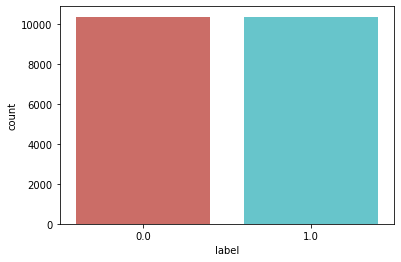

In [13]:
def create_distribution(dataFile):
    
    return sb.countplot(x='label', data=dataFile, palette='hls')

create_distribution(train_news)
print("number of records with fake and real news: ")
df['label'].value_counts()

In [16]:
#data integrity check (missing label values)
#none of the datasets contains missing values therefore no cleaning required
def data_qualityCheck():
    
    print("Checking data qualitites...")
    train_news.isnull().sum()
    train_news.info()
        
    print("check finished.")

    #below datasets were used to 
    #test_news.isnull().sum()
    #test_news.info()

    #valid_news.isnull().sum()
    #valid_news.info()

data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20877 entries, 0 to 20876
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      20798 non-null  float64
 1   title   20319 non-null  object 
 2   author  18841 non-null  object 
 3   text    20798 non-null  object 
 4   label   20719 non-null  float64
dtypes: float64(2), object(3)
memory usage: 815.6+ KB
check finished.


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
news = train_news['text']

train_news['cleaned text'] = word_tokenize(news)

In [19]:
#Stemming
def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

In [20]:
#process the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed

In [21]:
#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

In [22]:
#bigram
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

In [26]:
porter = PorterStemmer()

def tokenizer(text):
    return text.split(" ")


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]
